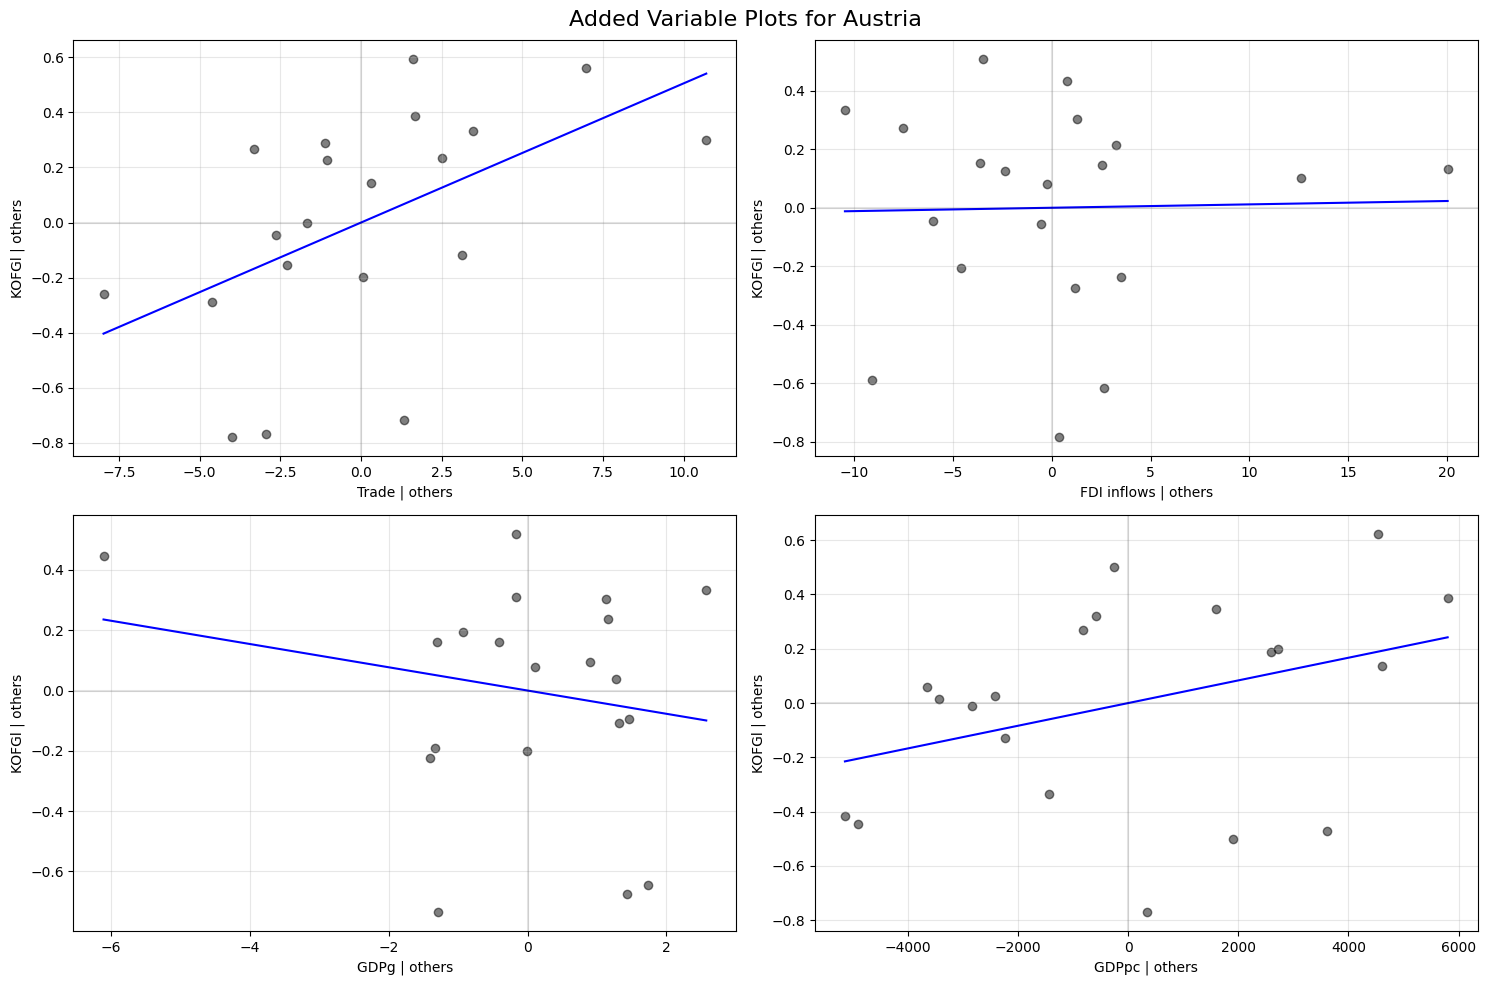

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read the data
df = pd.read_csv('austria.csv')

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle('Added Variable Plots for Austria', fontsize=16)

# Function to create added variable plot
def added_variable_plot(y, x, other_x, ax, xlabel):
    # Fit model of y on other variables
    y_model = sm.OLS(y, sm.add_constant(other_x)).fit()
    y_resid = y_model.resid
    
    # Fit model of x on other variables
    x_model = sm.OLS(x, sm.add_constant(other_x)).fit()
    x_resid = x_model.resid
    
    # Plot residuals
    ax.scatter(x_resid, y_resid, color='black', alpha=0.5)
    
    # Add regression line for residuals
    slope, intercept = np.polyfit(x_resid, y_resid, 1)
    line_x = np.array([min(x_resid), max(x_resid)])
    line_y = slope * line_x + intercept
    ax.plot(line_x, line_y, color='blue')
    
    # Customize plot
    ax.set_xlabel(f'{xlabel} | others')
    ax.set_ylabel('KOFGl | others')
    ax.grid(True, alpha=0.3)
    
    # Reset axis to be centered at 0
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.1)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.1)

# Prepare variables
y = df['Globalization Index Score of Austria']
trade = df['Trade Openness (ratio of trade to GDP)']
fdi = df['FDI inflow net inflows (% of GDP)']
gdp_growth = df['GDP growth rate (annual %)']
gdp_pc = df['GDP per capita (current USD)']

# For each variable, create added variable plot using others as controls
# Trade vs Globalization
other_vars_trade = pd.concat([fdi, gdp_growth, gdp_pc, trade], axis=1)
added_variable_plot(y, trade, other_vars_trade, axes[0,0], 'Trade')

# FDI vs Globalization
other_vars_fdi = pd.concat([trade, gdp_growth, gdp_pc, fdi], axis=1)
added_variable_plot(y, fdi, other_vars_fdi, axes[0,1], 'FDI inflows')

# GDP growth vs Globalization
other_vars_gdpg = pd.concat([trade, fdi, gdp_pc, gdp_growth], axis=1)
added_variable_plot(y, gdp_growth, other_vars_gdpg, axes[1,0], 'GDPg')

# GDP per capita vs Globalization
other_vars_gdppc = pd.concat([trade, fdi, gdp_growth, gdp_pc], axis=1)
added_variable_plot(y, gdp_pc, other_vars_gdppc, axes[1,1], 'GDPpc')

# Adjust layout
plt.tight_layout()
plt.show()

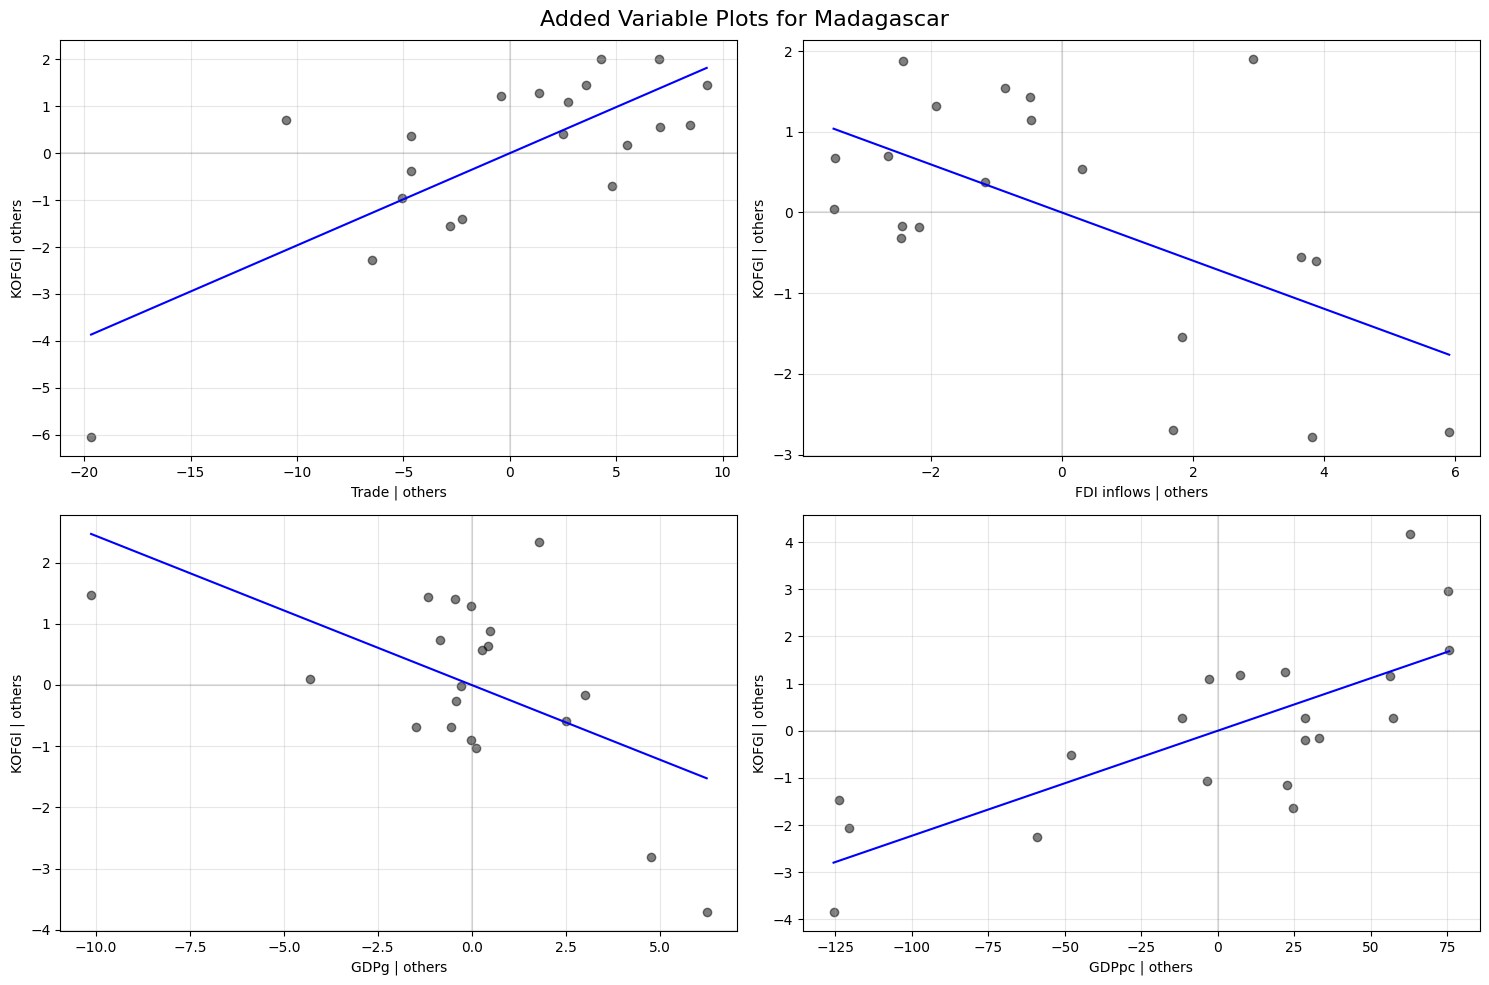

In [15]:
# Read the data
df = pd.read_csv('madagascar.csv')

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle('Added Variable Plots for Madagascar', fontsize=16)

# Prepare variables
y = df['Globalization Index Score of Madagascar']
trade = df['Trade Openness (ratio of trade to GDP)']
fdi = df['FDI inflow net inflows (% of GDP)']
gdp_growth = df['GDP growth rate (annual %)']
gdp_pc = df['GDP per capita (current USD)']

# For each variable, create added variable plot using others as controls
# Trade vs Globalization
other_vars_trade = pd.concat([fdi, gdp_growth, gdp_pc], axis=1)
added_variable_plot(y, trade, other_vars_trade, axes[0,0], 'Trade')

# FDI vs Globalization
other_vars_fdi = pd.concat([trade, gdp_growth, gdp_pc], axis=1)
added_variable_plot(y, fdi, other_vars_fdi, axes[0,1], 'FDI inflows')

# GDP growth vs Globalization
other_vars_gdpg = pd.concat([trade, fdi, gdp_pc], axis=1)
added_variable_plot(y, gdp_growth, other_vars_gdpg, axes[1,0], 'GDPg')

# GDP per capita vs Globalization
other_vars_gdppc = pd.concat([trade, fdi, gdp_growth], axis=1)
added_variable_plot(y, gdp_pc, other_vars_gdppc, axes[1,1], 'GDPpc')

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
# Prepare variables
y = df['Globalization Index Score of Madagascar']
X = df[['Trade Openness (ratio of trade to GDP)', 
        'FDI inflow net inflows (% of GDP)',
        'GDP growth rate (annual %)',
        'GDP per capita (current USD)']]

# Add constant for intercept
X = sm.add_constant(X)

# Fit multiple regression model
model = sm.OLS(y, X).fit()

# Print the equation
intercept = model.params[0]
trade_coef = model.params[1]
fdi_coef = model.params[2]
gdpg_coef = model.params[3]
gdppc_coef = model.params[4]

equation = f"KOFGI = {intercept:.3f} + {trade_coef:.3f}Trade + {fdi_coef:.3f}FDIinflows + {gdpg_coef:.3f}GDPg + {gdppc_coef:.3f}GDPpc"
print(equation)

# Print summary statistics
print("\nRegression Statistics:")
print(model.summary().tables[1])

KOFGI = 25.591 + 0.196Trade + -0.298FDIinflows + -0.244GDPg + 0.022GDPpc

Regression Statistics:
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     25.5905      2.570      9.957      0.000      20.112      31.069
Trade Openness (ratio of trade to GDP)     0.1965      0.044      4.496      0.000       0.103       0.290
FDI inflow net inflows (% of GDP)         -0.2982      0.111     -2.695      0.017      -0.534      -0.062
GDP growth rate (annual %)                -0.2436      0.095     -2.565      0.022      -0.446      -0.041
GDP per capita (current USD)               0.0223      0.005      4.544      0.000       0.012       0.033


C:\Users\Admin\AppData\Local\Temp\ipykernel_29528\2446774996.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
C:\Users\Admin\AppData\Local\Temp\ipykernel_29528\2446774996.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trade_coef = model.params[1]
C:\Users\Admin\AppData\Local\Temp\ipykernel_29528\2446774996.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fdi_coef = model.params[2]
C:\Users\A